In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [3]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_ori'
Casename1 = 'ASTEX_cold2.6'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [25]:
nt = f['time'].size
t_hours = np.arange(nt)
z = f['z']/1000.

f1 = f1.isel(time = slice(0, nt)) #f1 has a longer simulation time 

myfontsize = 12

In [42]:
def plt2D(fig, ax, x, y, var, 
          xlabel = '', ylabel = 'Height (km)',
          varname = 'Cloud fraction (%)', mycmap=cm.coolwarm, extend = 'neither', 
          mylevels=[0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          yrange = [0., 2.], xrange = [0., 39.], 
          cbar = False, out = False):

    norm = cm.colors.BoundaryNorm(mylevels,256)
    oax = ax.contourf(x,y,var, cmap = mycmap, levels = mylevels, extend = extend, norm = norm)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
            
#     ax.grid(True)

    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', 
                            shrink=0.8, pad = 0.05,ticks = [0.1, 1, 10, 30, 60, 90])
        cbar.set_label(ztitle, fontsize=0.6*myfontsize)

    if out:
        return oax

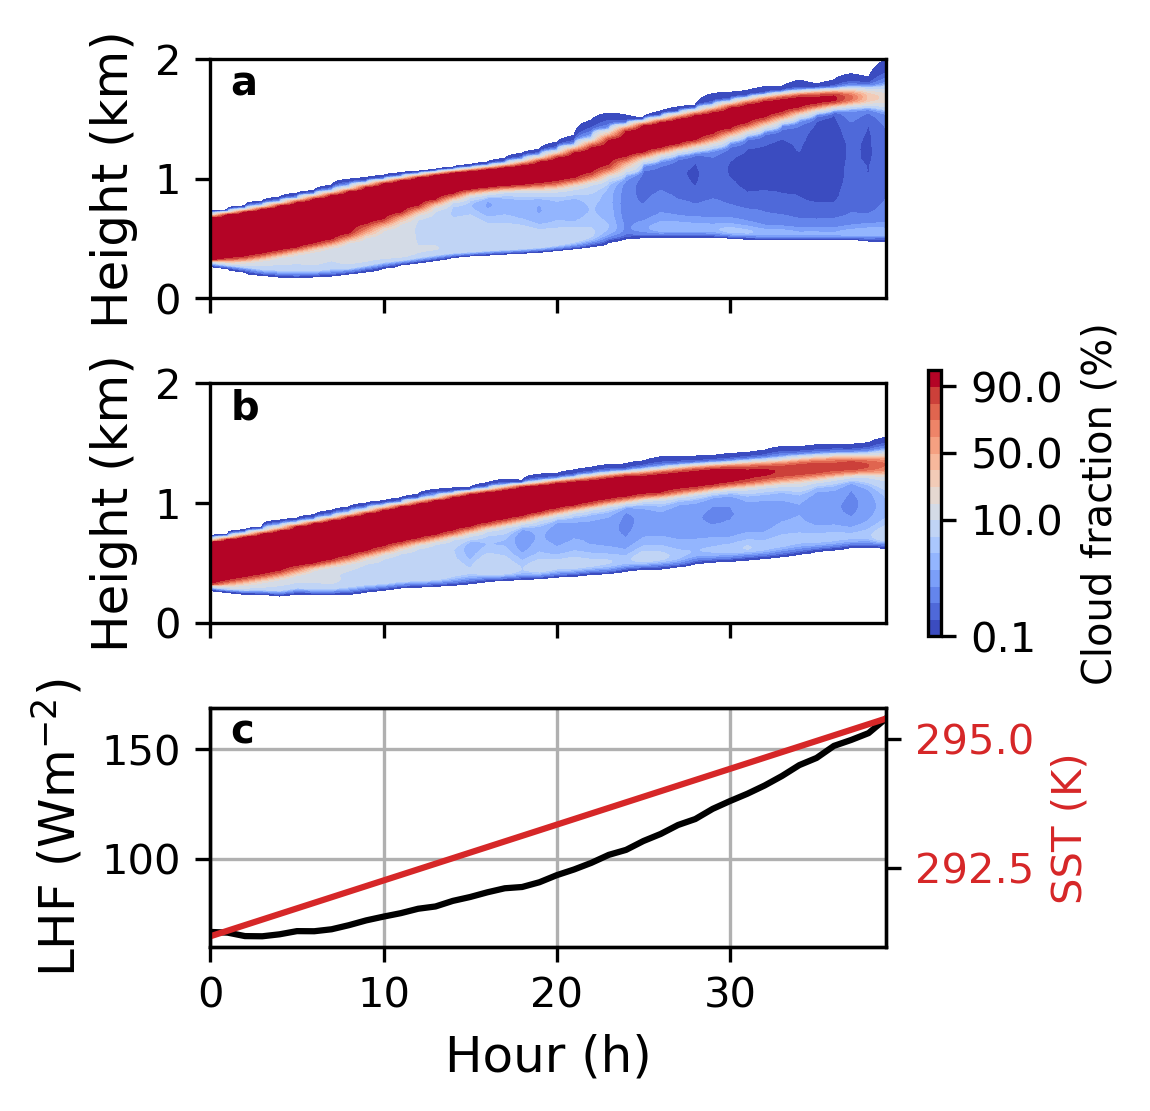

In [46]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 3,
                        sharex = True, sharey = False,
                        figsize=(9/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()

#Fig 1,2
oax = plt2D(fig, axs[0], t_hours, z, 100.*f.CLD.T, out = True)
oax = plt2D(fig, axs[1], t_hours, z, 100.*f1.CLD.T, out = True)

#Fig3
axs[2].plot(t_hours, f1.LHF, color = 'black', label = 'CTRL')
axs[2].set_ylabel(r"$\mathrm{LHF \ (Wm^{-2})}$", fontsize=myfontsize)
axs[2].set_xlabel("Hour (h)", fontsize=myfontsize)
axs[2].grid(True)

ax2 = axs[2].twinx()
ax2.plot(t_hours, f1.SST, color='tab:red')
ax2.set_ylabel('SST (K)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


cbar = fig.colorbar(oax, ax = axs, orientation='vertical', 
                    shrink=0.3, pad = 0.05,ticks = [0.1, 10, 50, 90])
cbar.set_label('Cloud fraction (%)', fontsize=0.8*myfontsize)

mylabel = np.array(('a','b','c'))
for i in range(3):
    axs[i].text(0.03, 0.85, mylabel[i], transform=axs[i].transAxes,
                fontsize=0.8*myfontsize, fontweight='bold')
#     axs[i].grid(True)

fig.savefig('Fig1_ASTEX_basic.png', dpi=fig.dpi, bbox_inches='tight')